## 課題3-5 回答例

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rng= np.random.default_rng();

In [3]:
df = pd.read_csv('SampleData.csv')  #csvデータをDataFrameへ読み込み

x= df['MaxHourPr_Tokyo'].values  #DataFrameの指定列を1次元numpy配列xに変換
y= df['MaxHourPr_Maebashi'].values  #DataFrameの指定列を1次元numpy配列xに変換

N1=len(x)
N2=len(y)

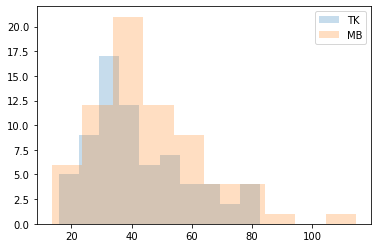

In [4]:
plt.hist(x, density=False, alpha=0.25, label="TK")
plt.hist(y, density=False, alpha=0.25, label="MB")
plt.legend(loc='upper right')

In [5]:
r= np.mean(x)-np.mean(y) # この例では統計量RはX,Yの標本平均の差とした
z= np.append(x,y)

In [6]:
B=50000
rp= np.empty(B)
for j in range(0,B): 
    rng.shuffle(z)
    xp= z[0:N1]
    yp= z[N1:N1+N2]
    rp[j]= np.mean(xp)-np.mean(yp) # この例では統計量RはX,Yの標本平均の差とした

In [7]:
if r > 0:
    pval= np.count_nonzero(rp > r)/B
else:
    pval= np.count_nonzero(rp < r)/B

print("p value =", pval)

p value = 0.15284


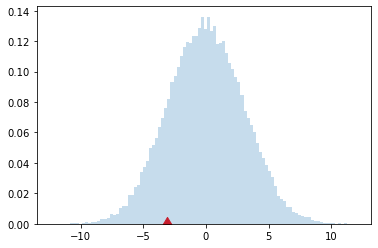

In [8]:
plt.hist(rp,bins=100,density=True,alpha=0.25) #帰無仮説が正しい（差がない）ときのRの確率密度分布
plt.scatter(r,0,color="red",marker="d",s=100) # Rの実現値の位置